In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

# Quantify demand form remain_stat

In [ ]:
district = '서초구'
data_path = './Data/district_0314-0512/'

df = pd.read_csv(data_path+district+'_0314-0512.csv', header=0, parse_dates=['collect_at', 'stock_at'], engine='python', encoding='utf-8-sig')
df.dropna(inplace=True)
df = df[['code', 'stock_at', 'collect_at', 'remain_stat']]
df = df[df.collect_at.dt.weekday.isin([0, 1, 2, 3, 4])]
df = df.groupby('code', group_keys=False).apply(lambda x: x[x.remain_stat.ne(x.remain_stat.shift())]).reset_index(drop=True)
df_ex_break = df[df['remain_stat']!='break']

In [ ]:
from pathlib import Path

output_file = district+'_status_change_0314-0512.csv'
output_file_ex_break = district+'_status_change_ex_break_0314-0512.csv'
output_dir = Path('./Data/status_change')

output_dir.mkdir(parents=True, exist_ok=True)

df.to_csv(output_dir / output_file, encoding='utf-8-sig')
df_ex_break.to_csv(output_dir / output_file_ex_break, encoding='utf-8-sig')

In [3]:
# 서초구 선정
data_path = './Data/status_change/서초구_status_change_ex_break_0314-0512.csv'
df = pd.read_csv(data_path, header=0, parse_dates=['collect_at', 'stock_at'], engine='python', encoding='utf-8-sig', index_col=0)
# df = df[df['stock_at'] >= '2020-04-01 00:00:00']
df['date'] = df['collect_at'].dt.date
df

,code,stock_at,collect_at,remain_stat,date
0,11800208,2020-03-15 09:26:00,2020-03-16 00:00:00,empty,2020-03-16
1,11800208,2020-03-16 08:27:00,2020-03-16 08:30:00,plenty,2020-03-16
2,11800208,2020-03-16 08:27:00,2020-03-16 08:55:00,some,2020-03-16
4,11800208,2020-03-16 08:27:00,2020-03-16 12:20:00,some,2020-03-16
5,11800208,2020-03-16 08:27:00,2020-03-16 12:35:00,few,2020-03-16
...,...,...,...,...,...
29972,12869414,2020-05-08 09:03:00,2020-05-08 09:10:00,plenty,2020-05-08
29973,12869414,2020-05-08 09:03:00,2020-05-08 20:10:00,empty,2020-05-08
29974,12869414,2020-05-11 08:54:00,2020-05-11 09:00:00,plenty,2020-05-11
29975,12869414,2020-05-11 08:54:00,2020-05-11 16:45:00,some,2020-05-11


In [5]:
df_plenty = df[df['remain_stat'] == 'plenty']
plenty = df_plenty.groupby(['code','date']).first()
plenty.rename(columns={'collect_at':'plenty_time'}, inplace=True)
plenty

stock_at         plenty_time remain_stat
code     date                                                          
11800208 2020-03-16 2020-03-16 08:27:00 2020-03-16 08:30:00      plenty
         2020-03-17 2020-03-17 08:04:00 2020-03-17 08:10:00      plenty
         2020-03-30 2020-03-30 08:12:00 2020-03-30 17:30:00      plenty
         2020-04-02 2020-04-02 08:16:00 2020-04-02 11:55:00      plenty
         2020-04-03 2020-04-03 08:12:00 2020-04-03 16:55:00      plenty
...                                 ...                 ...         ...
12869414 2020-05-05 2020-05-05 08:51:00 2020-05-05 09:00:00      plenty
         2020-05-06 2020-05-06 08:58:00 2020-05-06 09:05:00      plenty
         2020-05-07 2020-05-07 08:58:00 2020-05-07 09:05:00      plenty
         2020-05-08 2020-05-08 09:03:00 2020-05-08 09:10:00      plenty
         2020-05-11 2020-05-11 08:54:00 2020-05-11 09:00:00      plenty

[6239 rows x 3 columns]

In [6]:
last = df.groupby(['code', 'date']).last()
last.rename(columns={'collect_at':'last_state_time'}, inplace=True)
last

stock_at     last_state_time remain_stat
code     date                                                          
11800208 2020-03-16 2020-03-16 08:27:00 2020-03-16 20:05:00       empty
         2020-03-17 2020-03-17 08:04:00 2020-03-17 14:15:00       empty
         2020-03-18 2020-03-18 08:09:00 2020-03-18 18:30:00       empty
         2020-03-19 2020-03-19 08:18:00 2020-03-19 14:25:00       empty
         2020-03-20 2020-03-20 08:15:00 2020-03-20 11:45:00         few
...                                 ...                 ...         ...
12869414 2020-05-05 2020-05-05 08:51:00 2020-05-05 18:05:00       empty
         2020-05-06 2020-05-06 08:58:00 2020-05-06 20:15:00       empty
         2020-05-07 2020-05-07 08:58:00 2020-05-07 19:55:00       empty
         2020-05-08 2020-05-08 09:03:00 2020-05-08 20:10:00       empty
         2020-05-11 2020-05-11 08:54:00 2020-05-11 20:00:00       empty

[6767 rows x 3 columns]

In [0]:
result = pd.merge(plenty, last, on=['code', 'date'], how='left')
result.drop(['stock_at_y', 'remain_stat_x'], axis=1, inplace=True)
result.rename(columns={'stock_at_x':'stock_at','remain_stat_y':'last_state'}, inplace=True)
result['time_interval'] = result['last_state_time'] - result['plenty_time']
result['demand'] = result['last_state'].apply(lambda x: 300 if x == 'empty' else 270 if x == 'few'  else 200 if x == 'some' else 100)
result['hour'] = result['time_interval'].apply(lambda x: x.seconds/3600)
result['demand_rate'] = result['demand'] / result['hour']
result.drop('demand', axis=1, inplace=True)
result['demand_rate'] = result['demand_rate'].apply(lambda x: (100/9) if x==float('inf') else x)
result['hour'] = result['hour'].apply(lambda x: round(x,2))
result['demand_rate'] = result['demand_rate'].apply(lambda x: round(x,2))

## Demand prediction

In [0]:
df = result.reset_index()
graph = df[df['code']== 11803126]['demand_rate']

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# 그래프의 사이즈 및 글씨크기 등의 기본값을 변경할 경우
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['figure.titlesize'] = 27
plt.rcParams['axes.labelsize'] = 24

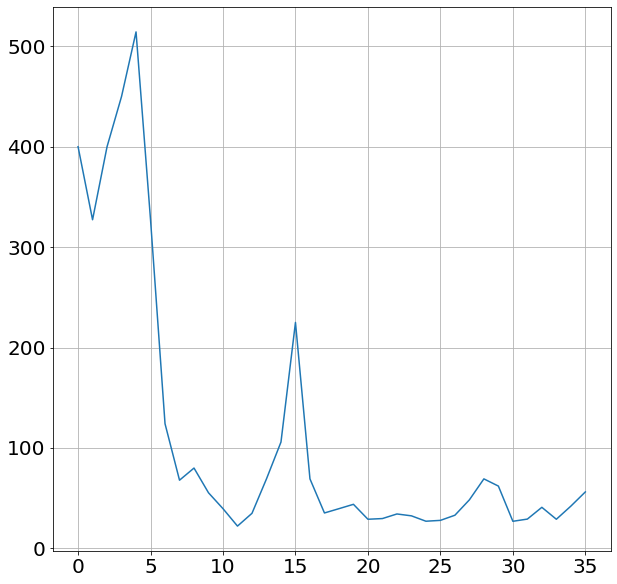

In [24]:
x = list(range(len(graph)))
plt.figure(figsize=(10,10))
plt.plot(x, graph)
plt.show()

In [9]:
sorted(result['demand_rate'], reverse=True)

[2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 1200.0,
 1200.0,
 1200.0,
 900.0,
 900.0,
 900.0,
 900.0,
 900.0,
 810.0,
 800.0,
 800.0,
 800.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 720.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 600.0,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 514.29,
 480.0,
 480.0,
 480.0,
 480.0,
 480.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 450.0,
 

In [0]:
demand_df = result.reset_index()[['code', 'date', 'hour', 'demand_rate']]
# print(len(demand_df))
drop_idx = demand_df[demand_df['demand_rate'] >= 400].index #demand_rate 400 이상 drop
demand_df = demand_df.drop(drop_idx)
# print(len(demand_df))

pharmacy_list = list(set(demand_df['code']))
num_pharmacy = len(pharmacy_list)

In [0]:
path = './DATA for optimization prob/'

with open(path+"pharmacy_list.txt", 'w') as output:
    for val in pharmacy_list:
        output.write(str(val) + '\n')

In [0]:
def weightedMean(weightArray):
    def inner(x):
        return (weightArray * x).mean()
    return inner

In [0]:
df_dict = {}
error_list = []

for pharm in pharmacy_list:
  df = demand_df[demand_df['code']==pharm]
  # create space for prediction
  prediction = pd.DataFrame([[None]*len(df.columns)], columns=df.columns)
  df = df.append(prediction, ignore_index=True)

  # get daily_demand
  working_hours = max(9, min(15, df['hour'].max()))
  df['daily_demand'] = np.array(df['demand_rate']) * working_hours * 0.55

  # Prediction
  window_size = 3
  # data 너무 적으면 스킵
  if len(df) < window_size+2:
    print('특별 처리 대상: {}'.format(pharm))
    continue

  '''1. get EMA'''
  '''demand_rate_history = df['demand_rate'].iloc[:-1]
  rate_preds = [np.nan] + list(demand_rate_history.ewm(span=window_size, min_periods=window_size).mean())'''
  '''2. get Weighted MA'''
  t = [v for v in np.arange(1, window_size+1)]
  sumv = sum(t) / window_size
  wts = np.array(t) / sumv
  demand_rate_history = df['demand_rate'].iloc[:-1]
  rate_preds = [np.nan] + list(demand_rate_history.rolling(window_size).apply(weightedMean(wts), raw=True))

  demand_preds = np.array(rate_preds) * working_hours * 0.55
  df['rate_pred'] = rate_preds
  df['demand_pred']= demand_preds
  df = df.iloc[window_size+1:]
  MAEs = list(df.apply(lambda row: np.abs(row['daily_demand']-row['demand_pred']), axis=1))
  if len(MAEs) > 1:
    error_list.append(np.mean(MAEs[-10:-1]))
  df['mae'] = MAEs

  df.loc[df.index[-1], 'code'] = pharm
  df.loc[df.index[-1], 'date'] = pd.to_datetime('2020-05-12')

  df_dict[pharm] = df[['code', 'date', 'demand_rate', 'rate_pred', 'daily_demand', 'demand_pred', 'mae']]

print('TOTAL MAE: {}'.format(np.mean(error_list)))

특별 처리 대상: 12862631
특별 처리 대상: 12817589
특별 처리 대상: 11870907
특별 처리 대상: 12866903
특별 처리 대상: 12849634
TOTAL MAE: 85.06371919977416


In [0]:
df_dict[pharmacy_list[0]]

,code,date,demand_rate,rate_pred,daily_demand,demand_pred,mae
4,12830721,2020-03-24,34.78,59.995000,223.235430,385.077908,161.842478
5,12830721,2020-03-25,34.78,42.368333,223.235430,271.941147,48.705717
6,12830721,2020-03-26,26.09,34.330000,167.458665,220.347105,52.888440
7,12830721,2020-03-27,17.14,30.435000,110.013090,195.347048,85.333958
8,12830721,2020-03-30,11.11,23.063333,71.309535,148.032005,76.722470
9,12830721,2020-04-01,11.11,15.616667,71.309535,100.235575,28.926040
10,12830721,2020-04-02,11.11,12.115000,71.309535,77.760127,6.450592
11,12830721,2020-04-03,11.11,11.110000,71.309535,71.309535,0.000000
12,12830721,2020-04-06,11.11,11.110000,71.309535,71.309535,0.000000
13,12830721,2020-04-07,11.11,11.110000,71.309535,71.309535,0.000000


In [0]:
total_df = pd.DataFrame(columns=df_dict[pharmacy_list[0]].columns)

for pharm, df in df_dict.items():
  total_df = total_df.append(df, ignore_index=True)

In [0]:
# 현재 약국별 demand 추정 수치 평균
total_df['demand_pred'].mean()

294.74070988193034

In [0]:
prediction_df = total_df[['code', 'date', 'rate_pred', 'demand_pred']]

In [0]:
prediction_df

,code,date,rate_pred,demand_pred
0,12830721,2020-03-24,59.995000,385.077908
1,12830721,2020-03-25,42.368333,271.941147
2,12830721,2020-03-26,34.330000,220.347105
3,12830721,2020-03-27,30.435000,195.347048
4,12830721,2020-03-30,23.063333,148.032005
...,...,...,...,...
5352,11874813,2020-04-29,30.781667,183.350998
5353,11874813,2020-05-06,20.981667,124.977298
5354,11874813,2020-05-08,14.036667,83.609405
5355,11874813,2020-05-11,16.465000,98.073773


In [0]:
data_path = './Data/Demand/Prediction/'
for pharm in df_dict.keys():
  df_dict[pharm].to_csv(data_path+'{}_Demand_Prediction.csv'.format(pharm), index=True, encoding='utf-8-sig')

In [0]:
prediction_df.to_csv(data_path+'SEOCHO_Demand_Prediction.csv', encoding='utf-8-sig', index=False)